In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt


pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
cd ~/Desktop/GA/NBA_Player_Prediction/

/Users/pwalesdi/Desktop/GA/NBA_Player_Prediction


In [3]:
nba_2019 = pd.read_csv('./csv_files/2019_advanced.txt')
nba_2018 = pd.read_csv('./csv_files/2018_advanced.txt')
nba_2017 = pd.read_csv('./csv_files/2017_advanced.txt')
nba_2016 = pd.read_csv('./csv_files/2016_advanced.txt')
nba_2015 = pd.read_csv('./csv_files/2015_advanced.txt')
nba_2014 = pd.read_csv('./csv_files/2014_advanced.txt')
nba_2013 = pd.read_csv('./csv_files/2013_advanced.txt')
nba_2012 = pd.read_csv('./csv_files/2012_advanced.txt')
nba_2011 = pd.read_csv('./csv_files/2011_advanced.txt')
nba_2010 = pd.read_csv('./csv_files/2010_advanced.txt')
nba_2009 = pd.read_csv('./csv_files/2009_advanced.txt')
nba_2008 = pd.read_csv('./csv_files/2008_advanced.txt')
nba_2007 = pd.read_csv('./csv_files/2007_advanced.txt')
nba_2006 = pd.read_csv('./csv_files/2006_advanced.txt')
draft_2019 = pd.read_csv('./csv_files/draft/2019_draft.txt')
draft_2018 = pd.read_csv('./csv_files/draft/2018_draft.txt')
draft_2017 = pd.read_csv('./csv_files/draft/2017_draft.txt')
draft_2016 = pd.read_csv('./csv_files/draft/2016_draft.txt')
draft_2015 = pd.read_csv('./csv_files/draft/2015_draft.txt')
draft_2014 = pd.read_csv('./csv_files/draft/2014_draft.txt')
draft_2013 = pd.read_csv('./csv_files/draft/2013_draft.txt')
draft_2012 = pd.read_csv('./csv_files/draft/2012_draft.txt')
draft_2011 = pd.read_csv('./csv_files/draft/2011_draft.txt')
draft_2010 = pd.read_csv('./csv_files/draft/2010_draft.txt')
draft_2009 = pd.read_csv('./csv_files/draft/2009_draft.txt')
draft_2008 = pd.read_csv('./csv_files/draft/2008_draft.txt')
draft_2007 = pd.read_csv('./csv_files/draft/2007_draft.txt')
draft_2006 = pd.read_csv('./csv_files/draft/2006_draft.txt')

nba_2019['SEASON'] = 2019
nba_2018['SEASON'] = 2018
nba_2017['SEASON'] = 2017
nba_2016['SEASON'] = 2016
nba_2015['SEASON'] = 2015
nba_2014['SEASON'] = 2014
nba_2013['SEASON'] = 2013
nba_2012['SEASON'] = 2012
nba_2011['SEASON'] = 2011
nba_2010['SEASON'] = 2010
nba_2009['SEASON'] = 2009
nba_2008['SEASON'] = 2008
nba_2007['SEASON'] = 2007
nba_2006['SEASON'] = 2006

draft_2019['DRAFT_YEAR+1'] = 2020
draft_2018['DRAFT_YEAR+1'] = 2019
draft_2017['DRAFT_YEAR+1'] = 2018
draft_2016['DRAFT_YEAR+1'] = 2017
draft_2015['DRAFT_YEAR+1'] = 2016
draft_2014['DRAFT_YEAR+1'] = 2015
draft_2013['DRAFT_YEAR+1'] = 2014
draft_2012['DRAFT_YEAR+1'] = 2013
draft_2011['DRAFT_YEAR+1'] = 2012
draft_2010['DRAFT_YEAR+1'] = 2011
draft_2009['DRAFT_YEAR+1'] = 2010
draft_2008['DRAFT_YEAR+1'] = 2009
draft_2007['DRAFT_YEAR+1'] = 2008
draft_2006['DRAFT_YEAR+1'] = 2007
#Creating a list of every advanced metrics DF
advanced_list = [nba_2019, nba_2018, nba_2017, nba_2016, nba_2015, nba_2014, nba_2013, 
           nba_2012, nba_2011, nba_2010, nba_2009, nba_2008, nba_2007, nba_2006]
#Creating a list of every draft DF
draft_list = [draft_2019, draft_2018, draft_2017, draft_2016, draft_2015, draft_2014, draft_2013, 
           draft_2012, draft_2011, draft_2010, draft_2009, draft_2008, draft_2007, draft_2006]

In [4]:
#Creating a master advanced metrics DF and a master draft DF
advanced = pd.concat([nba_2019, nba_2018, nba_2017, nba_2016, nba_2015, nba_2014, nba_2013, nba_2012, nba_2011, nba_2010, nba_2009, nba_2008, nba_2007, nba_2006])
draft = pd.concat([draft_2019, draft_2018, draft_2017, draft_2016, draft_2015, draft_2014, draft_2013, draft_2012, draft_2011, draft_2010, draft_2009, draft_2008, draft_2007, draft_2006])

In [5]:
#Splitting the player name and unique player id column and labeling them, then dropping the Player column and the unnamed columns
advanced[['player_name','player_id']] = advanced.Player.str.split("\\", expand=True)
advanced.drop(columns=['Player', 'Unnamed: 19', 'Unnamed: 24', 'Rk'], inplace=True)
advanced.head(3)

Pos  Age   Tm   G   MP  PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  SEASON   player_name  player_id
0  SG   25  OKC  31  588  6.3  0.507  0.809  0.083   0.9   7.8   4.2   4.3   1.3   0.9   7.9  12.2  0.1  0.6  0.6  0.053  -2.4  -0.9 -3.4  -0.2    2019  Álex Abrines  abrinal01
1  PF   28  PHO  10  123  2.9  0.379  0.833  0.556   2.7  20.1  11.3   8.2   0.4   2.7  15.2   9.2 -0.1  0.0 -0.1 -0.022  -5.7  -0.3 -5.9  -0.1    2019    Quincy Acy    acyqu01
2  PG   22  ATL  34  428  7.6  0.474  0.673  0.082   2.6  12.3   7.4  19.8   1.5   1.0  19.7  13.5 -0.1  0.2  0.1  0.011  -3.1  -1.3 -4.4  -0.3    2019  Jaylen Adams  adamsja01

In [6]:
#Splitting the player name and unique player id column and labeling them, then dropping various columns that are redundent between DFs
draft[['player_name','player_id']] = draft.Player.str.split("\\", expand=True)
draft.drop(columns=['Player', 'MP', 'MP.1', 'WS', 'WS/48', 'VORP', 'BPM', 'G', 'Rk'], inplace=True)
draft.head(3)

Pk   Tm                  College  Yrs  PTS  TRB  AST  FG%  3P%  FT%  PTS.1  TRB.1  AST.1  DRAFT_YEAR+1      player_name  player_id
0   1  NOP          Duke University  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN          2020  Zion Williamson  willizi01
1   2  MEM  Murray State University  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN          2020        Ja Morant  moranja01
2   3  NYK          Duke University  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN    NaN    NaN          2020       RJ Barrett  barrerj01

In [7]:
# Merge the DFs and then rename some of the columns and reorder all the columns
nba = pd.merge(advanced, draft, how='left', on='player_id')
nba.drop(columns=['player_name_y',], inplace=True)
nba.rename({'player_name_x':'Player_name', 'Tm_y':'Draft_team', 'PTS.1':'PPG', 'TRB.1':'RPG', 'AST.1':'APG'}, axis=1, inplace=True)
nba = nba[['Player_name', 'player_id','SEASON', 'Tm_x','DRAFT_YEAR+1','Draft_team','Pk','Pos','Age','G', 'MP', 'PER', 'TS%', '3PAr',
           'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
           'BPM', 'VORP', 'College', 'Yrs', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%', 'PPG', 'RPG', 'APG',]]
nba.loc[(nba['Tm_x'] == 'NOH'), 'Tm_x'] = 'NOP'
nba.loc[(nba['Tm_x'] == 'SEA'), 'Tm_x'] = 'NOP'
nba.loc[(nba['Tm_x'] == 'SEA'), 'Tm_x'] = 'NOP'
nba.loc[(nba['Tm_x'] == 'NJN'), 'Tm_x'] = 'BRK'
nba.loc[(nba['Tm_x'] == 'CHA'), 'Tm_x'] = 'CHO'
nba = nba[(nba.Tm_x != 'TOT')]


In [15]:
nba.sort_values(by=['DRAFT_YEAR+1','Pk'], ascending=[False, True])

Player_name  player_id  SEASON Tm_x  DRAFT_YEAR+1 Draft_team    Pk    Pos  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP                                            College  Yrs      PTS     TRB     AST    FG%    3P%    FT%   PPG   RPG  APG
28               Deandre Ayton  aytonde01    2019  PHO        2019.0        PHO   1.0      C   20  71  2183  20.5  0.608  0.005  0.217  11.1  26.1  18.5   9.6   1.3   2.6  11.7  21.2   4.1  1.7   5.8  0.128  -0.1   0.2   0.2   1.2                              University of Arizona  1.0   1159.0   729.0   125.0  0.585  0.000  0.746  16.3  10.3  1.8
30               Marvin Bagley  baglema01    2019  SAC        2019.0        SAC   2.0     PF   19  62  1567  18.9  0.562  0.136  0.371  10.4  20.8  15.5   5.9   1.0   3.2  10.7  24.2   2.0  1.6   3.6  0.110  -1.2  -0.7  -1.8   0.1                                    Duke University  1.0    923.0   471.0    62.0  0.504  0.313  0.691  14.9   7.6  1.0
181                Luka Dončić  doncilu01    2019  DAL        2019.0        ATL   3.0     SG   19  72  2318  19.6  0.545  0.433  0.409   4.0  21.9  13.0  31.6   1.6   0.9  15.0  30.5   2.1  2.8   4.9  0.101   2.9   1.2   4.1   3.6                                                NaN  1.0   1526.0   563.0   429.0  0.427  0.327  0.713  21.2   7.8  6.0
326              Jaren Jackson  jacksja02    2019  MEM        2019.0        MEM   4.0     PF   19  58  1515  16.4  0.591  0.241  0.334   5.3  15.0  10.1   7.2   1.7   5.1  12.7  22.8   1.2  2.2   3.3  0.105  -1.4   1.4   0.1   0.8                          Michigan State University  1.0    798.0   272.0    64.0  0.506  0.359  0.766  13.8   4.7  1.1
699                 Trae Young  youngtr01    2019  ATL        2019.0        DAL   5.0     PG   20  81  2503  17.0  0.539  0.384  0.330   2.6  10.2   6.3  40.5   1.3   0.5  17.6  28.4   2.5  0.7   3.3  0.062   1.8  -2.8  -1.1   0.6                             University of Oklahoma  1.0   1549.0   301.0   653.0  0.418  0.324  0.829  19.1   3.7  8.1
36               Mohamed Bamba  bambamo01    2019  ORL        2019.0        ORL   6.0      C   20  47   766  14.9  0.539  0.288  0.259   8.8  24.0  16.3   7.4   0.8   7.0  13.7  17.8   0.3  1.4   1.7  0.106  -3.3   3.1  -0.2   0.4                      University of Texas at Austin  1.0    292.0   233.0    39.0  0.481  0.300  0.587   6.2   5.0  0.8
116             Wendell Carter  cartewe01    2019  CHI        2019.0        CHI   7.0      C   19  44  1110  15.2  0.541  0.086  0.302   8.4  21.8  15.0  10.7   1.1   4.5  13.4  19.1   0.7  1.2   1.9  0.080  -2.4   1.8  -0.5   0.4                                    Duke University  1.0    455.0   307.0    78.0  0.485  0.188  0.795  10.3   7.0  1.8
589              Collin Sexton  sextoco01    2019  CLE        2019.0        CLE   8.0     PG   20  82  2605  12.0  0.520  0.245  0.211   2.3   8.0   5.0  15.3   0.8   0.2  12.3  25.2  -0.1 -0.5  -0.6 -0.011  -1.5  -3.7  -5.2  -2.1                              University of Alabama  1.0   1371.0   236.0   243.0  0.430  0.402  0.839  16.7   2.9  3.0
375                 Kevin Knox   knoxke01    2019  NYK        2019.0        NYK   9.0     PF   19  75  2158   8.7  0.475  0.398  0.247   2.9  13.6   8.1   6.0   1.0   0.9  10.1  22.3  -2.2  0.9  -1.3 -0.030  -3.6  -2.4  -6.0  -2.2                             University of Kentucky  1.0    963.0   335.0    82.0  0.370  0.343  0.717  12.8   4.5  1.1
77               Mikal Bridges  bridgmi01    2019  PHO        2019.0        PHI  10.0     SF   22  82  2417  10.8  0.556  0.556  0.210   2.5   9.7   6.0   9.8   2.5   1.3  10.2  12.2   1.7  1.2   2.9  0.058  -0.5   0.3  -0.2   1.1                               Villanova University  1.0    684.0   264.0   173.0  0.430  0.335  0.805   8.3   3.2  2.1
243    Shai Gilgeous-Alexander  gilgesh01    2019  LAC        2019.0        CHO  11.0     PG   20  82  2174  13.4  0.554  0.194  0.272   2.9   8.3   5.7  17.8   2.1   1.

Text(0, 0.5, 'WS per 48')

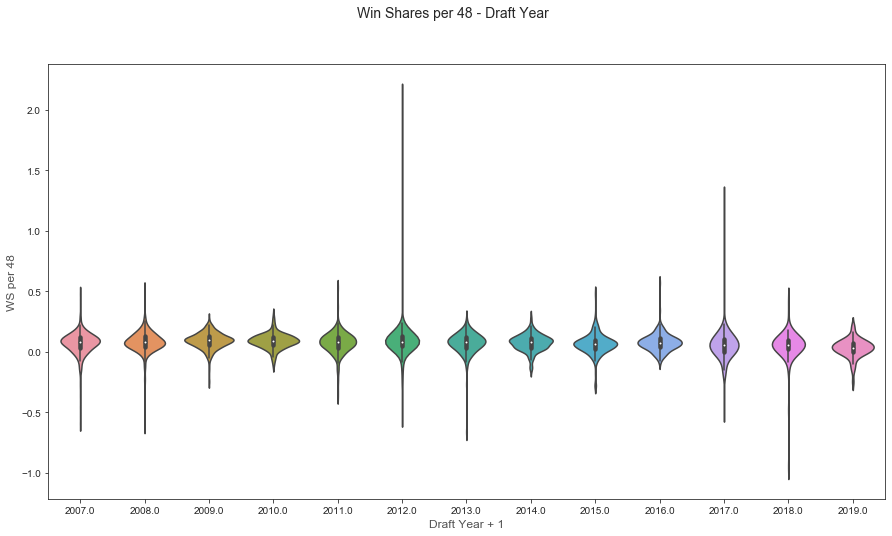

In [295]:
f, (ax) = plt.subplots(1, 1, figsize=(15, 8))
f.suptitle('Win Shares per 48 - Draft Year', fontsize=14)

sns.violinplot(data=nba,
               x="DRAFT_YEAR+1", 
               y="WS/48",   
               ax=ax)

ax.set_xlabel("Draft Year + 1",size=12,alpha=0.8)
ax.set_ylabel("WS per 48",size=12,alpha=0.8)


PER               WS            VORP     
           mean    sum      mean   sum      mean  sum
Tm_x                                                 
ATL   11.735294  199.5  1.476471  25.1 -0.058824 -1.0
BOS   11.758333  282.2  1.133333  27.2  0.125000  3.0
BRK   11.383333  136.6  1.150000  13.8  0.083333  1.0
CHA   10.885714  152.4  1.071429  15.0 -0.207143 -2.9
CHI   10.120000  202.4  1.430000  28.6  0.060000  1.2
CHO   10.600000   74.2  1.057143   7.4 -0.171429 -1.2
CLE    8.687500  139.0  0.731250  11.7 -0.243750 -3.9
DAL    9.052941  153.9  0.705882  12.0  0.217647  3.7
DEN   11.823529  201.0  0.694118  11.8  0.029412  0.5
DET   10.380000  259.5  1.208000  30.2  0.124000  3.1
GSW   10.473684  199.0  0.960000  19.2  0.025000  0.5
HOU   11.917647  202.6  0.947059  16.1  0.141176  2.4
IND   13.547368  257.4  0.747368  14.2 -0.089474 -1.7
LAC   10.609091  233.4  0.659091  14.5 -0.072727 -1.6
LAL    9.182609  211.2  0.773913  17.8 -0.008696 -0.2
MEM   11.425000  274.2  0.837500  20.1 -0.150000 -3.6
MIA    9.640000   96.4  1.810000  18.1  0.020000  0.2
MIL   11.452381  240.5  1.171429  24.6 -0.047619 -1.0
MIN   12.638095  265.4  1.419048  29.8 -0.038095 -0.8
NJN   13.245455  145.7  1.445455  15.9 -0.145455 -1.6
NOH   13.100000   91.7  2.142857  15.0  0.285714  2.0
NOK    9.033333   27.1  0.533333   1.6 -0.133333 -0.4
NOP   16.000000   32.0  1.150000   2.3  0.100000  0.2
NYK   11.788889  212.2  1.544444  27.8  0.166667  3.0
OKC   10.575000  169.2  1.100000  17.6  0.068750  1.1
ORL   10.522222  189.4  1.066667  19.2  0.088889  1.6
PHI   11.838095  248.6  1.319048  27.7 -0.052381 -1.1
PHO    9.200000  239.2  0.592308  15.4 -0.146154 -3.8
POR   10.262500  246.3  0.970833  23.3  0.045833  1.1
SAC   10.886957  250.4  1.273913  29.3 -0.091304 -2.1
SAS   10.484615  136.3  1.030769  13.4  0.200000  2.6
SEA   11.366667   34.1  0.833333   2.5 -0.233333 -0.7
TOR    9.828571  137.6  1.307143  18.3  0.150000  2.1
TOT    9.637037  260.2  0.474074  12.8 -0.233333 -6.3
UTA   11.230000  224.6  1.230000  24.6  0.055000  1.1
WAS   10.480000  157.2  1.020000  15.3 -0.046667 -0.7

In [21]:
# rookie_year['Draft_team'] = rookie_year['Tm_x']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
nba.loc[nba['SEASON'] == 2019].groupby(['Tm_x', 'Player_name'])['PER', 'WS', 'VORP'].agg(sum)

PER    WS  VORP
Tm_x Player_name                               
ATL  Alex Len                  17.2   3.2   0.4
     Alex Poythress            12.2   0.5   0.0
     B.J. Johnson              14.0   0.1  -0.1
     Daniel Hamilton            7.1  -0.1  -0.2
     DeAndre' Bembry           10.8   0.9  -0.1
     Dewayne Dedmon            16.0   4.0   1.3
     Deyonta Davis             15.6   0.4   0.0
     Isaac Humphries            3.4  -0.1  -0.2
     Jaylen Adams               7.6   0.1  -0.3
     Jeremy Lin                15.9   1.9  -0.1
     John Collins              21.8   6.0   1.6
     Jordan Sibert             29.7   0.0   0.0
     Justin Anderson           11.2   0.4  -0.1
     Kent Bazemore             11.9   0.7  -0.1
     Kevin Huerter             10.1   1.5   0.1
     Miles Plumlee             18.9   0.5   0.1
     Omari Spellman            12.4   1.2   0.2
     Taurean Waller-Prince     11.9   1.5   0.0
     Trae Young                17.0   3.3   0.6
     Tyler Dorsey               7.8  -0.1  -0.3
     Tyler Zeller               1.5   0.0   0.0
     Vince Carter              11.8   1.9   0.1
BOS  Al Horford                20.2   7.5   3.4
     Aron Baynes               14.0   2.4   0.5
     Brad Wanamaker            14.3   1.0   0.0
     Daniel Theis              17.0   3.5   1.0
     Gordon Hayward            15.6   4.9   1.2
     Greg Monroe               60.2   0.1   0.1
     Guerschon Yabusele        12.4   0.5   0.0
     Jaylen Brown              13.5   3.0   0.0
     Jayson Tatum              15.1   5.0   0.8
     Kyrie Irving              24.3   9.1   4.7
     Marcus Morris             14.2   4.5   0.3
     Marcus Smart              13.1   5.3   2.1
     PJ Dozier                 16.0   0.1   0.0
     R.J. Hunter               21.5   0.1   0.0
     Robert Williams           18.8   1.2   0.5
     Semi Ojeleye               8.5   0.7  -0.3
     Terry Rozier              12.9   3.2   0.6
BRK  Alan Williams             32.9   0.2   0.1
     Allen Crabbe               7.7   0.8  -0.1
     Caris LeVert              14.9   1.7   0.5
     D'Angelo Russell          19.4   5.0   3.3
     DeMarre Carroll           12.1   3.1   0.1
     Džanan Musa                5.8  -0.1  -0.1
     Ed Davis                  17.3   5.7   0.9
     Jared Dudley               7.8   1.8   0.4
     Jarrett Allen             18.5   7.6   2.4
     Joe Harris                13.5   5.5   1.7
     Kenneth Faried            20.5   0.4   0.0
     Mitch Creek               21.5   0.2   0.0
     Rodions Kurucs            11.0   1.6  -0.1
     Rondae Hollis-Jefferson   12.5   1.2  -0.3
     Shabazz Napier            15.3   2.0   0.3
     Spencer Dinwiddie         16.3   4.8   0.8
     Tahjere McCall             9.6   0.0   0.0
     Theo Pinson                8.1   0.0  -0.1
     Treveon Graham             6.1   0.5  -0.2
CHI  Antonio Blakeney          10.6  -0.5  -1.3
     Bobby Portis              17.2   0.7  -0.1
     Brandon Sampson            8.5   0.0  -0.1
     Cameron Payne             10.3   0.2  -0.3
     Chandler Hutchison         8.8   0.6  -0.5
     Cristiano Felício         13.4   1.4  -0.3
     JaKarr Sampson            22.5   0.5   0.0
     Jabari Parker             14.6   0.5  -0.3
     Justin Holiday            11.0   1.3   0.9
     Kris Dunn                 12.4   0.6   0.1
     Lauri Markkanen           17.1   2.7   0.0
     Otto Porter               18.0   1.1   0.4
     Rawle Alkins               8.1  -0.1  -0.1
     Robin Lopez               15.9   2.7   0.4
     Ryan Arcidiacono          11.6   3.7   0.5
     Shaquille Harrison        12.4   1.4   0.2
     Timothé Luwawu-Cabarrot    9.0   0.3  -0.3
     Tyler Ulis                 0.0   0.0   0.0
     Walt Lemon                16.3   0.1   0.0
     Wayne Selden               8.1  -0.4  -0.8
     Wendell Carter            15.2   1.9   0.4
     Zach LaVine               18.7   2.8   1.1
CHO  Bismack Biyombo           14.4   2.0   0.2
     Cody Zeller               17.2   3.9   1.2


In [209]:
second_year.loc[(second_year['Tm_x'] == 'NOH'), 'Tm_x'] = 'NOP'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [212]:
second_year = nba.loc[(nba['SEASON'] ==  nba['DRAFT_YEAR+1'] + 1)]
order = second_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
second_year.loc[(second_year['Tm_x'] == 'NOH'), 'Tm_x'] = 'NOP'
second_year.loc[(second_year['Tm_x'] == 'SEA'), 'Tm_x'] = 'NOP'
second_year.loc[(second_year['Tm_x'] == 'SEA'), 'Tm_x'] = 'NOP'
second_year.loc[(second_year['Tm_x'] == 'NJN'), 'Tm_x'] = 'BRK'
second_year.loc[(second_year['Tm_x'] == 'CHA'), 'Tm_x'] = 'CHO'
second_year = second_year[(second_year.Tm_x != 'TOT')]
second_year


Player_name  player_id  SEASON Tm_x  DRAFT_YEAR+1 Draft_team    Pk Pos  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP                                            College   Yrs      PTS     TRB     AST    FG%    3P%    FT%   PPG   RPG  APG
4                  Bam Adebayo  adebaba01    2019  MIA        2018.0        MIA  14.0   C   21  82  1913  17.9  0.623  0.031  0.465   9.2  24.0  16.6  14.2   1.8   3.0  17.1  15.8  3.4  3.4   6.8  0.171  -0.6   3.6   3.0   2.4                             University of Kentucky   2.0   1206.0   978.0   285.0  0.550  0.136  0.728   8.0   6.5  1.9
10               Jarrett Allen  allenja01    2019  BRK        2018.0        BRK  22.0   C   20  80  2096  18.5  0.632  0.079  0.489   9.6  24.0  16.8   7.9   1.0   4.5  13.0  15.9  4.4  3.3   7.6  0.175  -0.7   3.2   2.5   2.4                      University of Texas at Austin   2.0   1460.0  1060.0   159.0  0.590  0.183  0.732   9.6   7.0  1.0
11                Kadeem Allen  allenka01    2019  NYK        2018.0        BOS  53.0  SG   26  19   416  16.2  0.574  0.255  0.383   2.0  11.1   6.4  28.7   1.9   0.8  13.6  19.6  0.7  0.2   1.0  0.111   0.5  -1.6  -1.1   0.1                              University of Arizona   2.0    208.0    62.0    88.0  0.436  0.362  0.778   5.6   1.7  2.4
18                Ike Anigbogu  anigbik01    2019  IND        2018.0        IND  47.0   C   20   3     6  -6.0  0.000  0.000  0.000  18.9  36.2  27.7  19.4   0.0  14.8  25.0  29.1 -0.1  0.0  -0.1 -0.480 -22.5   8.5 -14.0   0.0               University of California Los Angeles   2.0     13.0    12.0     1.0  0.333    NaN  0.833   0.9   0.9  0.1
22                  OG Anunoby  anunoog01    2019  TOR        2018.0        TOR  23.0  SF   21  67  1352   9.8  0.544  0.500  0.153   4.8  10.8   7.9   4.7   1.6   1.3  11.3  15.5  0.3  1.7   2.0  0.070  -1.3   0.1  -1.2   0.3                                 Indiana University   2.0    907.0   381.0   102.0  0.461  0.351  0.605   6.4   2.7  0.7
29                Dwayne Bacon  bacondw01    2019  CHO        2018.0        NOP  40.0  SG   23  43   759  11.7  0.570  0.339  0.179   1.1  11.7   6.3   9.2   0.8   0.6   6.1  16.8  0.9  0.3   1.2  0.073  -1.2  -2.4  -3.5  -0.3                           Florida State University   2.0    491.0   213.0    85.0  0.432  0.377  0.761   5.1   2.2  0.9
35                  Lonzo Ball   balllo01    2019  LAL        2018.0        LAL   2.0  PG   21  47  1423  11.7  0.487  0.500  0.105   4.0  14.0   9.1  23.8   2.3   1.1  17.8  16.9 -0.2  1.7   1.6  0.052  -0.9   1.5   0.5   0.9               University of California Los Angeles   2.0    993.0   611.0   631.0  0.380  0.315  0.437  10.0   6.2  6.4
51                 Jordan Bell   belljo01    2019  GSW        2018.0        CHI  38.0   C   24  68   788  12.9  0.531  0.010  0.214   7.8  16.7  12.5  12.3   1.2   5.4  16.7  13.7  0.5  1.1   1.6  0.096  -3.1   2.8  -0.4   0.3                               University of Oregon   2.0    485.0   391.0   178.0  0.570  0.000  0.647   3.9   3.1  1.4
62           Jaron Blossomgame  blossja01    2019  CLE        2018.0        SAS  59.0  SF   25  27   439  10.2  0.510  0.368  0.123   6.3  19.1  12.4   4.2   0.8   1.6   9.0  12.2  0.2  0.1   0.3  0.030  -3.1  -1.5  -4.5  -0.3                                 Clemson University   1.0    114.0    98.0    13.0  0.443  0.256  0.769   4.2   3.6  0.5
66                Jonah Bolden  boldejo01    2019  PHI        2018.0        PHI  36.0  PF   23  44   639  12.7  0.595  0.593  0.167   8.0  19.0  13.7   8.5   1.3   4.8  17.2  13.8  0.5  0.9   1.4  0.106  -0.8   2.0   1.2   0.5                                                NaN   1.0    207.0   165.0    40.0  0.494  0.354  0.481   4.7   3.8  0.9
73                Tony Bradley  bradlto01    2019  UTA        2018.0        LAL  28.0   C   21   3    36  19.6  0.504  0.000  0.125  27.6  17.7  22.6   4.5   2.7   4.4  15.1  23.6  0.0  0.1   0.1  0.130

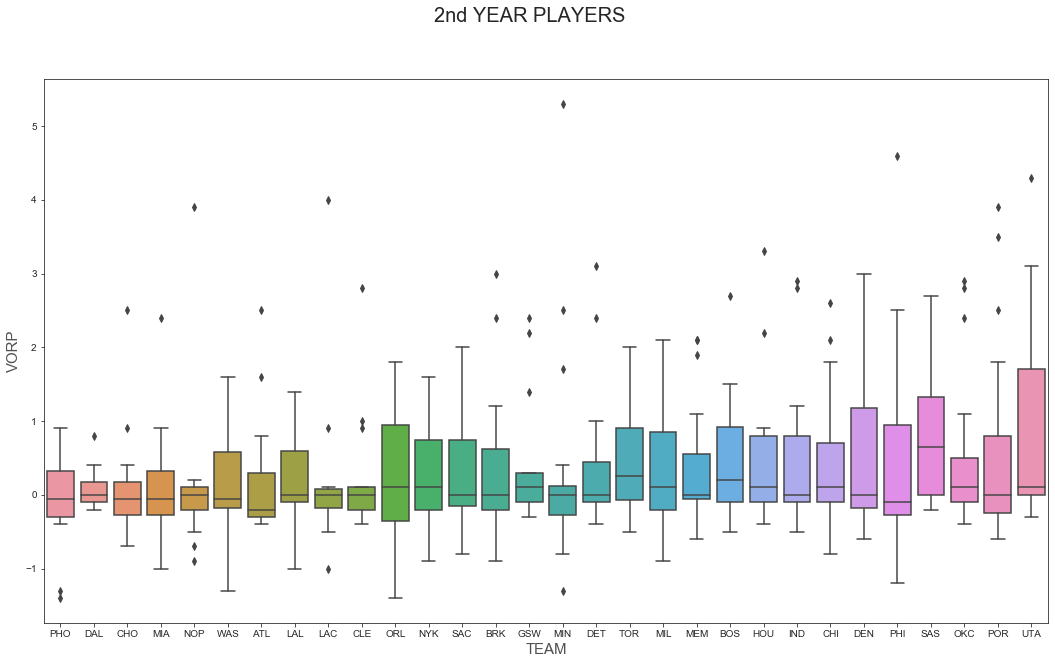

In [221]:
order = second_year.groupby('Tm_x')['VORP'].sum().sort_values(ascending=True)
f, (ax) = plt.subplots(1, 1, figsize=(18, 10))
f.suptitle('2nd YEAR PLAYERS', fontsize=20)

sns.boxplot(data=second_year,
               x="Tm_x", 
               y='VORP',   
               ax=ax,
               order=order.index)

ax.set_xlabel("TEAM",size=15,alpha=0.8)
ax.set_ylabel("VORP",size=15,alpha=0.8);
f.savefig("2nd_year_best.png")

In [222]:
second_year.groupby('Tm_x')["VORP"].describe()

count      mean       std  min    25%   50%    75%  max
Tm_x                                                         
ATL    15.0  0.186667  0.846730 -0.4 -0.300 -0.20  0.300  2.5
BOS    16.0  0.475000  0.826640 -0.5 -0.100  0.20  0.925  2.7
BRK    18.0  0.300000  1.024408 -0.9 -0.200  0.00  0.625  3.0
CHI    21.0  0.404762  0.850574 -0.8 -0.100  0.10  0.700  2.6
CHO    14.0  0.114286  0.800824 -0.7 -0.275 -0.05  0.175  2.5
CLE    13.0  0.261538  0.876107 -0.4 -0.200  0.00  0.100  2.8
DAL     8.0  0.112500  0.335676 -0.2 -0.100  0.00  0.175  0.8
DEN    18.0  0.500000  1.083567 -0.6 -0.175  0.00  1.175  3.0
DET    15.0  0.413333  1.028776 -0.4 -0.100  0.00  0.450  3.1
GSW    15.0  0.406667  0.870523 -0.3 -0.100  0.10  0.300  2.4
HOU    17.0  0.488235  0.965584 -0.4 -0.100  0.10  0.800  3.3
IND    19.0  0.447368  0.966304 -0.5 -0.100  0.00  0.800  2.9
LAC    10.0  0.320000  1.378244 -1.0 -0.175  0.00  0.075  4.0
LAL    17.0  0.170588  0.662160 -1.0 -0.100  0.00  0.600  1.4
MEM    19.0  0.384211  0.826144 -0.6 -0.050  0.00  0.550  2.1
MIA    12.0  0.150000  0.879566 -1.0 -0.275 -0.05  0.325  2.4
MIL    19.0  0.352632  0.830909 -0.9 -0.200  0.10  0.850  2.1
MIN    20.0  0.305000  1.437276 -1.3 -0.275  0.00  0.125  5.3
NOP    13.0  0.138462  1.179363 -0.9 -0.200  0.00  0.100  3.9
NYK    19.0  0.263158  0.741028 -0.9 -0.200  0.10  0.750  1.6
OKC    23.0  0.452174  0.958156 -0.4 -0.100  0.10  0.500  2.9
ORL    18.0  0.261111  0.883269 -1.4 -0.350  0.10  0.950  1.8
PHI    22.0  0.431818  1.293716 -1.2 -0.275 -0.10  0.950  4.6
PHO    16.0 -0.056250  0.626066 -1.4 -0.300 -0.05  0.325  0.9
POR    23.0  0.521739  1.263097 -0.6 -0.250  0.00  0.800  3.9
SAC    23.0  0.230435  0.613807 -0.8 -0.150  0.00  0.750  2.0
SAS    12.0  0.816667  0.959008 -0.2  0.000  0.65  1.325  2.7
TOR    14.0  0.450000  0.748074 -0.5 -0.075  0.25  0.900  2.0
UTA    17.0  0.852941  1.346346 -0.3  0.000  0.10  1.700  4.3
WAS    18.0  0.150000  0.681909 -1.3 -0.175 -0.05  0.575  1.6

In [223]:
second_year.groupby(['Tm_x', 'Player_name'])['PER', 'WS', 'VORP'].agg(sum)

PER    WS  VORP
Tm_x Player_name                               
ATL  Acie Law                  10.6   0.7  -0.4
     Al Horford                17.0   6.8   2.5
     DeAndre' Bembry            7.6  -0.4  -0.3
     Dennis Schröder           15.7   2.5  -0.2
     Edy Tavares               14.4   0.2   0.0
     Jeff Teague               14.6   1.7   0.1
     John Collins              21.8   6.0   1.6
     John Jenkins               4.7  -0.1  -0.2
     Lamar Patterson            5.1   0.2  -0.3
     Mike Muscala              18.0   1.9   0.5
     Mike Scott                15.3   2.6  -0.4
     Shelden Williams           9.8   0.5  -0.3
     Solomon Jones              6.8   0.0  -0.3
     Taurean Waller-Prince     12.8   2.0   0.8
     Tyler Dorsey               7.8  -0.1  -0.3
BOS  Abdel Nader                5.1  -0.1  -0.5
     Avery Bradley             11.3   2.4   0.2
     Gabe Pruitt                7.6   0.4  -0.1
     Glen Davis                10.7   3.7   0.4
     Guerschon Yabusele        12.3   0.6   0.1
     James Young                3.6   0.1  -0.1
     Jared Sullinger           16.4   3.9   0.9
     Jaylen Brown              13.6   4.5   1.0
     Jayson Tatum              15.1   5.0   0.8
     Jordan Mickey              9.8   0.1  -0.1
     Kelly Olynyk              15.9   3.6   1.5
     Leon Powe                 20.9   4.3   0.2
     Marcus Smart              11.3   2.9   1.1
     Rajon Rondo               15.6   7.2   2.7
     Semi Ojeleye               8.5   0.7  -0.3
     Terry Rozier              10.9   1.4  -0.2
BRK  Brook Lopez               20.1   7.9   3.0
     Caris LeVert              14.2   2.3   0.7
     Chris Douglas-Roberts     11.5   0.7  -0.9
     Courtney Lee              12.8   3.1   0.7
     Damion James               6.1  -0.2  -0.2
     Isaiah Whitehead          11.5  -0.1  -0.2
     Jarrett Allen             18.5   7.6   2.4
     Josh Boone                14.8   3.7   0.3
     MarShon Brooks            13.5   1.3   0.0
     Marcus Williams           11.0   0.2  -0.4
     Markel Brown              11.3   0.6  -0.2
     Mason Plumlee             18.0   4.8   1.2
     Maurice Ager               7.1  -0.1  -0.2
     Rondae Hollis-Jefferson   13.7   2.6   0.4
     Sean Williams              8.8   0.3   0.0
     Sergey Karasev            10.5   0.7   0.1
     Tyshawn Taylor             5.4  -0.6  -0.5
     Yi Jianlian               10.9   0.7  -0.8
CHI  Aaron Gray                11.5   1.3   0.1
     Bobby Portis              14.9   2.4  -0.3
     Cameron Bairstow           6.8   0.0  -0.1
     Cedric Simmons            -8.7  -0.1  -0.1
     Demetris Nichols          -3.5   0.0   0.0
     Denzel Valentine          12.1   2.5   0.8
     Derrick Rose              18.6   6.0   1.8
     Doug McDermott            10.9   2.8  -0.5
     Jerian Grant              13.2   2.5   0.4
     Jimmy Butler              15.2   7.0   2.1
     Joakim Noah               16.5   6.4   2.6
     Joe Alexander              2.8   0.0   0.0
     Kris Dunn                 14.5   0.9   0.7
     Lauri Markkanen           17.1   2.7   0.0
     Paul Zipser                5.2  -0.6  -0.8
     R.J. Hunter               -3.2   0.0   0.0
     Shannon Brown            -11.8  -0.3  -0.1
     Taj Gibson                14.3   5.2   0.9
     Thabo Sefolosha           11.4   1.5   0.3
     Tony Snell                10.2   2.4   0.2
     Tyrus Thomas              14.6   2.4   0.5
CHO  Alexis Ajinça              6.3   0.0  -0.1
     Bismack Biyombo           10.1   1.4  -0.7
     Cody Zeller               14.1   3.8   0.9
     D.J. Augustin             11.2   2.8  -0.2
     Dwayne Bacon              11.7   1.2  -0.3
     Frank Kaminsky            13.0   2.3   0.2
     Gerald Henderson          13.2   2.4  -0.1
     Jared Dudley              10.6   0.8   0.1
     Jeffery Taylor             5.9  -0.2  -0.5
     Kemba Walker              18.8   4.8   2.5
     Malik Monk                11.8   0.3  -0.6
     Marcus Paige               9.1   0.0   0.0


In [ ]:
second_year.loc[(second_year['Tm_x'] == 'NOH'), 'Tm_x'] = 'NOP'

In [243]:
for player in nba['Player_name']:
    print(nba.loc[nba[player]])

Bam Adebayo
Jarrett Allen
Kadeem Allen
Ike Anigbogu
OG Anunoby
Dwayne Bacon
Lonzo Ball
Jordan Bell
Jaron Blossomgame
Jonah Bolden
Tony Bradley
Dillon Brooks
Sterling Brown
Thomas Bryant
John Collins
Zach Collins
Tyler Dorsey
Tyler Dorsey
Damyean Dotson
Jawun Evans
Jawun Evans
Terrance Ferguson
De'Aaron Fox
Markelle Fultz
Harry Giles
Josh Hart
Isaiah Hartenstein
Jonathan Isaac
Wesley Iwundu
Frank Jackson
Josh Jackson
Justin Jackson
Justin Jackson
Luke Kennard
Kyle Kuzma
T.J. Leaf
Tyler Lydon
Lauri Markkanen
Frank Mason
Donovan Mitchell
Malik Monk
Monte Morris
Frank Ntilikina
Semi Ojeleye
Justin Patton
Ivan Rabb
Davon Reed
Dennis Smith
Dennis Smith
Edmond Sumner
Caleb Swanigan
Caleb Swanigan
Jayson Tatum
Sindarius Thornwell
Derrick White
D.J. Wilson
Wade Baldwin
Malik Beasley
DeAndre' Bembry
Dragan Bender
Joel Bolomboy
Malcolm Brogdon
Jaylen Brown
Marquese Chriss
Deyonta Davis
Cheick Diallo
Kris Dunn
Henry Ellenson
Daniel Hamilton
Juan Hernangómez
Buddy Hield
Brandon Ingram
Damian Jones


In [255]:
nba.groupby(by="Player_name")nba.loc[nba['SEASON']['VORP'] > nba[(['SEASON'] - 2)][(['VORP'])]]

In [270]:
df = nba.groupby(by="Player_name").agg(lambda x: list(x))

In [304]:
for index in df.index:
    hello = (df.loc[index][['SEASON', 'VORP']])
    print(hello)


SEASON    [2017]
VORP      [-0.1]
Name: A.J. Hammons, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015, 2014, 2013, 2012, 2011, 2010]
VORP         [-0.1, -0.1, 0.1, 0.0, -0.3, 0.0]
Name: A.J. Price, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2017, 2016, 2015, 2014, 2013, 2011, 201...
VORP      [-0.1, -0.6, -0.4, 0.3, 0.2, -0.2, -0.5, 1.6, ...
Name: Aaron Brooks, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015]
VORP          [2.0, 1.0, 0.8, 1.8, -0.2]
Name: Aaron Gordon, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2013, 2012, 2011, 2010, 2009, 2008]
VORP           [-0.1, -0.1, 0.0, 0.0, 0.2, 0.1, 0.0]
Name: Aaron Gray, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2017, 2016]
VORP       [-0.1, 0.0, -0.1]
Name: Aaron Harrison, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019]
VORP      [-0.1]
Name: Aaron Holiday, dtype: object
<class 'pandas.core

Name: Anthony Bennett, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2017, 2016]
VORP       [0.0, -0.1, -0.5]
Name: Anthony Brown, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2012, 2011, 2010, 2009, 2008, 2007, 2006]
VORP         [-0.1, -0.1, 0.0, 0.1, 0.7, -0.1, -0.3]
Name: Anthony Carter, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015, 2014, 2013]
VORP             [4.9, 4.9, 3.9, 2.3, 5.7, 3.9, 2.0]
Name: Anthony Davis, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2006]
VORP      [-0.1]
Name: Anthony Goldwire, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2006]
VORP       [0.0]
Name: Anthony Grundy, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2010, 2009, 2008, 2008, 2008, 2007, 2007, 200...
VORP      [0.1, 0.3, -0.4, -0.1, -0.3, -0.7, -0.1, -0.6,...
Name: Anthony Johnson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017, 2016, 2015, 2014, 2

SEASON    [2015, 2014]
VORP      [-0.1, -0.6]
Name: Brandon Davies, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019]
VORP      [-0.1]
Name: Brandon Goodwin, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017]
VORP       [-0.3, 0.4, -1.1]
Name: Brandon Ingram, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2017, 2016, 2015, 2014, 2013, 2012, 201...
VORP        [-0.1, -0.5, 0.1, 1.1, 1.0, 2.1, 2.5, 2.1, 1.9]
Name: Brandon Jennings, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2019, 2019, 2017, 2016, 2015, 2014, 201...
VORP      [-0.6, -0.3, -0.3, -0.7, 0.8, 1.6, 0.7, -0.1, ...
Name: Brandon Knight, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018]
VORP      [-0.1]
Name: Brandon Paul, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2013, 2011, 2010, 2009, 2008, 2007]
VORP           [-0.1, 0.0, 3.7, 5.7, 3.9, 2.1]
Name: Brandon Roy, dtype: object
<class 'pandas.core.series.S

SEASON    [2016, 2015, 2014, 2013, 2012, 2011, 2010]
VORP           [0.1, -0.3, -0.1, 0.0, 0.6, 0.6, 0.3]
Name: Chase Budinger, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2017]
VORP       [-0.4, 0.0]
Name: Chasson Randle, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2013, 2012, 2011, 2010, 2009, 2009, 200...
VORP      [-0.3, 0.2, 0.3, 2.3, 3.2, 3.2, 0.0, 3.1, 5.2,...
Name: Chauncey Billups, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017]
VORP       [0.1, -0.2, -0.2]
Name: Cheick Diallo, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2009, 2009, 2009, 2009, 2008]
VORP        [-0.2, 0.0, -0.1, -0.1, 0.0]
Name: Cheikh Samb, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019]
VORP      [-0.3]
Name: Chimezie Metu, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2017]
VORP       [-0.1, 0.0]
Name: Chinanu Onuaku, dtype: object
<class 'pandas.core.series.Series'>
SEASON 

SEASON    [2007, 2006]
VORP      [-0.4, -0.4]
Name: Daniel Ewing, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2013, 2012, 2011, 2010, 2009, 2008, 2007]
VORP            [-0.3, 0.0, 0.5, 0.4, 0.6, 0.9, 0.2]
Name: Daniel Gibson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018]
VORP       [-0.2, 0.0]
Name: Daniel Hamilton, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017]
VORP      [-0.1]
Name: Daniel Ochefu, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2013, 2012]
VORP        [-0.1, 0.0, 0.2]
Name: Daniel Orton, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018]
VORP        [1.0, 1.1]
Name: Daniel Theis, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015, 2013, 2012, 201...
VORP      [2.6, 0.1, 1.5, 1.5, 1.2, 2.5, 1.4, 1.3, 1.6, ...
Name: Danilo Gallinari, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2007, 2006]
VORP      [-0.3, -0.4]

SEASON    [2019]
VORP       [0.0]
Name: Donte Grantham, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2009]
VORP       [0.0]
Name: Dontell Jefferson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2012, 2011, 2010, 2009]
VORP      [-0.3, -0.4, -0.2, -1.1]
Name: Donté Greene, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2009, 2008, 2008, 2008, 2007, 2006]
VORP          [0.3, -0.1, -0.1, 0.0, 0.8, 0.7]
Name: Donyell Marshall, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...
VORP      [0.4, 0.4, 1.5, 1.2, 2.5, 1.3, -0.2, 0.3, 0.1,...
Name: Dorell Wright, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017]
VORP        [1.1, -0.1, 0.2]
Name: Dorian Finney-Smith, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2013]
VORP      [-0.4, -0.8]
Name: Doron Lamb, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2007, 2006]
VORP       [-0

SEASON    [2018, 2017]
VORP      [-0.1, -0.1]
Name: Georgios Papagiannis, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2006]
VORP      [-0.1]
Name: Gerald Fitch, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015, 2014, 2013, 201...
VORP      [-0.5, 0.0, -0.4, -0.4, -0.2, 1.8, -0.4, 0.1, ...
Name: Gerald Green, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
VORP         [-0.5, -0.5, 0.3, 0.2, 0.2, -0.3, -0.1, -0.2]
Name: Gerald Henderson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...
VORP      [-0.1, 0.6, 2.0, 2.1, 2.5, 4.3, 4.1, 2.6, 3.9,...
Name: Gerald Wallace, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018]
VORP       [0.0]
Name: Gian Clavell, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015, 2014]
VORP            [7.6, 5.4, 6.9, 3.2, 1.6, 0.1]


SEASON    [2019, 2018]
VORP        [2.0, 2.0]
Name: Jakob Pöltl, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019]
VORP      [-0.2]
Name: Jalen Brunson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018]
VORP      [-0.1, -0.2]
Name: Jalen Jones, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2007, 2006, 2006, 2006]
VORP        [0.1, -0.3, -0.4, 0.1]
Name: Jalen Rose, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015, 2014]
VORP       [0.0, -0.1]
Name: Jamaal Franklin, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2012, 2011, 2010, 2009, 2008, 2008, 2008, 200...
VORP      [-0.5, 0.0, -0.5, -0.3, -0.7, -0.6, -0.1, -1.1...
Name: Jamaal Magloire, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2013, 2012, 2010, 2008, 2007, 2006]
VORP         [-0.2, -0.3, -0.4, -0.3, 0.0, 1.3, 0.2]
Name: Jamaal Tinsley, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 20

SEASON    [2019, 2018, 2017, 2016]
VORP         [0.0, 0.0, 0.4, -0.5]
Name: Jerian Grant, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2006]
VORP      [-0.1]
Name: Jermaine Jackson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2013, 2012, 2011, 2010, 2009, 2009, 200...
VORP      [0.2, 0.0, 0.0, -0.1, 1.0, 0.5, 0.3, 0.2, 0.0,...
Name: Jermaine O'Neal, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2011, 2010]
VORP      [-0.2, -0.3]
Name: Jermaine Taylor, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2009, 2008]
VORP      [-0.2, -0.4]
Name: Jermareo Davidson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2012]
VORP      [-0.1]
Name: Jerome Dyson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2009, 2008, 2007, 2006]
VORP        [0.0, 0.0, -0.4, -0.5]
Name: Jerome James, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015, 2012]
VORP        [0.2, 0.1]
Name: Jerome Jordan, dtype: o

Name: Jonny Flynn, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2016, 2015]
VORP        [0.0, 0.1]
Name: Jordan Adams, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018]
VORP        [0.3, 1.2]
Name: Jordan Bell, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015]
VORP          [0.0, 0.1, -0.4, 0.4, 0.6]
Name: Jordan Clarkson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2017, 2014, 2013, 2012, 2011]
VORP          [0.0, 0.2, 0.1, 0.2, -0.2, -0.5]
Name: Jordan Crawford, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017, 2016, 2015, 2014, 2012, 2011, 2010, 200...
VORP      [0.0, 0.1, 0.0, 0.2, 0.1, 0.5, 0.2, -0.3, 1.2,...
Name: Jordan Farmar, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2016, 2015, 2014, 2013, 2012]
VORP           [0.0, 0.0, 0.3, 0.1, 0.0]
Name: Jordan Hamilton, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017, 2016, 2015, 201

SEASON    [2019, 2018, 2017, 2016]
VORP          [5.7, 5.5, 5.3, 3.2]
Name: Karl-Anthony Towns, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2008]
VORP      [-0.1]
Name: Kasib Powell, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]
VORP              [3.6, 0.4, 6.2, 6.2, 4.1, 3.8, 2.7, 2.4]
Name: Kawhi Leonard, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2017]
VORP      [-0.4, -0.4]
Name: Kay Felder, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019]
VORP      [-0.1]
Name: Keita Bates-Diop, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2016]
VORP      [-0.1]
Name: Keith Appling, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2012]
VORP       [0.0]
Name: Keith Benson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2013, 2012, 2011, 2010, 2009, 2009, 200...
VORP      [0.0, 0.3, -0.1, 0.7, 0.8, 0.6, 0.4, 0.2, 1.8,...
Name: Keit

SEASON    [2019, 2018]
VORP        [0.0, 0.1]
Name: Lauri Markkanen, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017, 2016, 2015, 2014, 2013, 2012]
VORP          [0.4, 0.6, 0.8, -0.2, -0.3, 0.1]
Name: Lavoy Allen, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2007, 2006]
VORP        [0.1, 0.0]
Name: Lawrence Roberts, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2013, 2012, 2011]
VORP       [0.0, -0.2, -0.2]
Name: Lazar Hayward, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015, 2014, 2013, 201...
VORP      [4.9, 8.9, 7.3, 7.6, 5.9, 8.0, 9.8, 7.6, 8.2, ...
Name: LeBron James, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017, 2016, 2015, 2014, 2013, 2012, 2011, 201...
VORP      [-0.5, 0.0, 0.3, -0.2, -0.1, 0.0, 0.0, 0.0, 1....
Name: Leandro Barbosa, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2006]
VORP      [-0.1]
Name: Lee Nailon, dtype: object
<class 'pandas.core.

SEASON    [2018, 2016, 2015]
VORP      [-0.1, -0.2, -0.1]
Name: Markel Brown, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018]
VORP      [-0.1, -0.1]
Name: Markelle Fultz, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2019, 2019, 2018, 2017, 2016, 2015, 201...
VORP      [-0.3, 0.0, -0.2, 0.7, 0.6, -0.3, 1.2, 1.6, 0....
Name: Markieff Morris, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2009, 2008, 2007, 2006]
VORP         [-0.4, 0.8, 0.5, 0.9]
Name: Marko Jarić, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2019, 2019, 2018, 2017]
VORP        [-0.5, -0.2, -0.3, 0.0, 0.2]
Name: Marquese Chriss, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006]
VORP         [-0.4, -0.2, 0.6, -0.1, 0.0, -0.2, -0.4, 1.5]
Name: Marquis Daniels, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2014, 2013]
VORP      [-0.1, -0.8, -0.5]
Name: Marquis Teag

SEASON    [2019]
VORP      [-0.3]
Name: Moritz Wagner, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2012, 2009, 2008]
VORP       [0.0, -0.3, -0.1]
Name: Morris Almond, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2011, 2010, 2009, 2008, 2007, 2006]
VORP          [0.0, -0.2, -0.3, 0.9, 0.5, 2.4]
Name: Morris Peterson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2009, 2009, 2009, 2008, 2007]
VORP          [0.0, 0.0, 0.0, 0.0, -0.4]
Name: Mouhamed Sene, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2011]
VORP      [-0.1, -0.2]
Name: Mustafa Shakur, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2012]
VORP      [-0.2]
Name: Mychel Thompson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018]
VORP       [0.1]
Name: Myke Henry, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016]
VORP         [2.8, 1.3, 2.8, -0.1]
Name: Myles Turner, dtype: object
<class 'pandas.

SEASON    [2015, 2014]
VORP       [-0.2, 0.1]
Name: Pero Antić, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015, 2014, 2013]
VORP      [-0.5, -0.1, -0.5]
Name: Perry Jones, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014]
VORP      [-0.3]
Name: Peyton Siva, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2016, 2015, 2014]
VORP       [-0.3, 0.0, -0.7]
Name: Phil Pressey, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017]
VORP      [-0.1]
Name: Pierre Jackson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2011, 2010, 2009, 2009, 2009, 2007]
VORP        [0.0, -0.1, -0.3, 0.0, -0.3, -0.2]
Name: Pops Mensah-Bonsu, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2010, 2008, 2008, 2008, 2008, 2007, 2006]
VORP       [-0.2, -0.5, -0.4, 0.0, -0.1, -0.6, -0.5]
Name: Primož Brezec, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006]
VORP            [

SEASON    [2019, 2018, 2017]
VORP         [0.0, 0.1, 0.8]
Name: Rodney McGruder, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018]
VORP      [-0.4]
Name: Rodney Purvis, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017, 2016, 2015, 2014, 2013, 2012, 2011, 201...
VORP      [-0.7, -0.2, 0.9, -1.0, -0.3, 0.8, 1.3, 0.7, 1...
Name: Rodney Stuckey, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2013, 2012, 2011, 2010]
VORP         [-0.2, 0.9, 0.1, 0.6]
Name: Rodrigue Beaubois, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007]
VORP          [-0.1, 0.1, -0.2, -0.2, 0.1, 1.0, 0.5, -0.5]
Name: Roger Mason, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2007]
VORP      [-0.1]
Name: Roger Powell, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2010, 2009]
VORP      [-0.1, -0.8]
Name: Roko Ukić, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2019, 

SEASON    [2014]
VORP       [0.0]
Name: Shane Edwards, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2016, 2015, 2014]
VORP       [0.0, -0.1, -0.2, -0.3]
Name: Shane Larkin, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...
VORP      [-0.1, -0.3, 0.0, 0.2, 0.1, 0.3, -0.1, -0.1, 0...
Name: Shannon Brown, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018]
VORP        [0.2, 0.2]
Name: Shaquille Harrison, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2011, 2010, 2009, 2008, 2008, 2008, 2007, 2006]
VORP              [0.7, 0.5, 2.3, 0.6, 0.3, 0.3, 0.8, 2.1]
Name: Shaquille O'Neal*, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2008, 2007, 2006]
VORP        [0.0, -0.1, 1.4]
Name: Shareef Abdur-Rahim, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2006]
VORP       [0.0]
Name: Sharrod Ford, dtype: object
<class 'pandas.core.series.Series'>
SEASON    

SEASON    [2019, 2019, 2019, 2018]
VORP      [-0.5, -0.2, -0.3, -0.5]
Name: Timothé Luwawu-Cabarrot, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2019, 2019, 2018, 2017, 2016, 2015, 201...
VORP      [1.8, 1.5, 0.3, 1.8, 2.0, 1.9, 1.0, 0.1, 0.4, ...
Name: Tobias Harris, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017]
VORP      [-0.2]
Name: Tomas Satoransky, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018]
VORP        [0.8, 1.3]
Name: Tomáš Satoranský, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
VORP            [0.1, 0.8, 0.0, -0.1, 0.6, -0.5, 1.4, 0.3]
Name: Toney Douglas, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2006]
VORP       [0.2]
Name: Toni Kukoč, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2018, 2017, 2016, 2015, 2014, 2013, 2012, 201...
VORP      [-0.2, 1.3, 0.8, 2.2, 1.4, 1.8, 1.7, 2.1, 0.6,...
Name: Tony Allen, d

SEASON    [2019, 2018]
VORP      [-0.2, -0.4]
Name: Wesley Iwundu, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2019, 2019, 2018, 2017, 2016, 2015, 201...
VORP      [-0.3, -0.1, -0.2, 0.9, 0.0, 1.0, 0.3, 1.2, -0...
Name: Wesley Johnson, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2019, 2019, 2019, 2018, 2017, 2016, 201...
VORP      [0.3, 0.2, -0.1, 0.2, 1.1, 1.3, 1.6, 3.0, 3.1,...
Name: Wesley Matthews, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2019, 2018, 2017, 2016, 2015, 2014, 2013]
VORP          [-0.1, 2.0, 1.0, 1.1, 0.3, -0.1, -0.8]
Name: Will Barton, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2007]
VORP      [-0.2]
Name: Will Blalock, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2006]
VORP       [-0.1, -0.4, -0.1, -0.4, -0.3, -0.2, 0.1, -0.2]
Name: Will Bynum, dtype: object
<class 'pandas.core.series.Series'>
SEASON    [2015]
VORP       [0.0]